## Stock prices - Exploration of data
Done by Wieland Vandebotermet

### Which Companies?

#### Intel
#### AMD

# Key Terms in Stock Data(thanks to ChatGTP)

    Open:
        Definition: The price at which a stock first trades upon the opening of the stock market on a given day.
        Significance: Indicates the market's initial response to news and events that occurred overnight or during non-trading hours.

    High:
        Definition: The highest price at which a stock traded during a given period (daily, hourly, etc.).
        Significance: Reflects the maximum price buyers were willing to pay for the stock during that period. It can indicate bullish sentiment.

    Low:
        Definition: The lowest price at which a stock traded during a given period.
        Significance: Shows the minimum price sellers were willing to accept. It can indicate bearish sentiment.

    Close:
        Definition: The price of the stock at the end of the trading day.
        Significance: The closing price is critical for analysis as it is often used in charts and is the most commonly referenced price when looking at historical performance.

    Adj Close (Adjusted Close):
        Definition: The closing price adjusted for corporate actions like stock splits, dividends, and rights offerings.
        Significance: Provides a more accurate reflection of the stock's value over time by factoring in events that affect the overall share value. It is commonly used in performance calculations and comparisons.

    Price:
        Definition: This term can refer to the current trading price of the stock at the time of data retrieval. In some contexts, it may be synonymous with the "Close" price for the most recent trading session.
        Significance: It reflects the latest price at which the stock was bought or sold. In some datasets, it may be represented as the last price before the market closed.

    Volume:
        Definition: The total number of shares traded during a given period.
        Significance: High volume can indicate strong investor interest in a stock, while low volume can suggest a lack of interest or conviction. Volume is important for confirming trends; for instance, a price increase accompanied by high volume is generally considered more significant than a price increase with low volume.

# Importing all required libraries

python3.10 -m venv StockPrediction

In [102]:
import pandas as pd
import numpy as np
from IPython.display import display
from scipy.stats import zscore
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats.mstats import winsorize

# Clean and explore
Now that we have imported all required libraries, we can begin with exploring the data.

In [103]:
AMD = pd.read_csv('./Data/amd_stock_data_1985-2023.csv')
Intel = pd.read_csv('./Data/intel_stock_data_1985-2023.csv')


# Rename columns to remove spaces from the name and make them all lowercase.
AMD.columns = AMD.columns.str.lower().str.replace(' ', '_')
print("\nAMD Columns:", AMD.columns)

Intel.columns = Intel.columns.str.lower().str.replace(' ', '_')
print("\nIntel Columns:", Intel.columns)


AMD Columns: Index(['price', 'adj_close', 'close', 'high', 'low', 'open', 'volume'], dtype='object')

Intel Columns: Index(['price', 'adj_close', 'close', 'high', 'low', 'open', 'volume'], dtype='object')


In [104]:
# Look for the Na-values. Fix them if possible.

print("\nMissing values from AMD in each column before fixing:")
display(AMD.isnull().sum())

print("\nMissing values from Intel in each column before fixing:")
display(Intel.isnull().sum())


Missing values from AMD in each column before fixing:


price        0
adj_close    1
close        1
high         1
low          1
open         1
volume       1
dtype: int64


Missing values from Intel in each column before fixing:


price        0
adj_close    1
close        1
high         1
low          1
open         1
volume       1
dtype: int64

We had 1 Empty value so we will take a closer look.

In [105]:
print("\nAMD head:")
display(AMD.head())

print("\nAMD head:")
display(AMD.head())


AMD head:


,price,adj_close,close,high,low,open,volume
0,Ticker,AMD,AMD,AMD,AMD,AMD,AMD
1,Date,NaN,NaN,NaN,NaN,NaN,NaN
2,1985-01-02 00:00:00+00:00,14.5,14.5,14.6875,14.375,14.6875,435800
3,1985-01-03 00:00:00+00:00,14.4375,14.4375,14.8125,14.3125,14.5,821200
4,1985-01-04 00:00:00+00:00,14.5,14.5,14.6875,14.3125,14.375,710000



AMD head:


,price,adj_close,close,high,low,open,volume
0,Ticker,AMD,AMD,AMD,AMD,AMD,AMD
1,Date,NaN,NaN,NaN,NaN,NaN,NaN
2,1985-01-02 00:00:00+00:00,14.5,14.5,14.6875,14.375,14.6875,435800
3,1985-01-03 00:00:00+00:00,14.4375,14.4375,14.8125,14.3125,14.5,821200
4,1985-01-04 00:00:00+00:00,14.5,14.5,14.6875,14.3125,14.375,710000


As we can see the columns schould be renamed to Datetime, adj_close, close, high, low, open, volume and we schould skip the first 2 rows

In [106]:
column_names = ["datetime", "adj_close", "close", "high", "low", "open", "volume"]

# has to skip 3 since we use custom columns
FixedAMD = pd.read_csv("./Data/amd_stock_data_1985-2023.csv", skiprows=3, names=column_names, header=None)
FixedIntel = pd.read_csv("./Data/intel_stock_data_1985-2023.csv", skiprows=3, names=column_names, header=None)

# turn our datetime into panda's datetime
FixedAMD['datetime'] = pd.to_datetime(FixedAMD['datetime'])
FixedIntel['datetime'] = pd.to_datetime(FixedIntel['datetime'])

print("\nAMD head:")
display(FixedAMD.head())

print("\nIntell head:")
display(FixedIntel.head())

print("\nMissing values from AMD in each column before fixing:")
display(FixedAMD.isnull().sum())

print("\nMissing values from Intel in each column before fixing:")
display(FixedIntel.isnull().sum())


AMD head:


,datetime,adj_close,close,high,low,open,volume
0,1985-01-02 00:00:00+00:00,14.5000,14.5000,14.6875,14.3750,14.6875,435800
1,1985-01-03 00:00:00+00:00,14.4375,14.4375,14.8125,14.3125,14.5000,821200
2,1985-01-04 00:00:00+00:00,14.5000,14.5000,14.6875,14.3125,14.3750,710000
3,1985-01-07 00:00:00+00:00,14.3125,14.3125,14.6875,14.1875,14.6250,579800
4,1985-01-08 00:00:00+00:00,13.4375,13.4375,14.3750,13.1875,14.3125,2018000



Intell head:


,datetime,adj_close,close,high,low,open,volume
0,1985-01-02 00:00:00+00:00,0.319440,0.572917,0.588542,0.567708,0.583333,27259200
1,1985-01-03 00:00:00+00:00,0.325247,0.583333,0.593750,0.572917,0.572917,31075200
2,1985-01-04 00:00:00+00:00,0.331056,0.593750,0.598958,0.583333,0.583333,11688000
3,1985-01-07 00:00:00+00:00,0.339768,0.609375,0.609375,0.588542,0.593750,12465600
4,1985-01-08 00:00:00+00:00,0.328152,0.588542,0.619792,0.578125,0.609375,33734400



Missing values from AMD in each column before fixing:


datetime     0
adj_close    0
close        0
high         0
low          0
open         0
volume       0
dtype: int64


Missing values from Intel in each column before fixing:


datetime     0
adj_close    0
close        0
high         0
low          0
open         0
volume       0
dtype: int64

While stock prices can have outliers they aren't really "fixable" as they represent important events for the company,
we focus on the outliers as found in the "adj_close" column as they provide a stable and comparable price point across time.
The other are more volatile and can easliy fluctuate more significantly.

In [107]:
# Method 1: Detect Outliers using the IQR (Interquartile Range) method
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify outliers
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    
    return outliers, lower_bound, upper_bound

# Method 2: Detect Outliers using Z-score (Standard Deviation method)
def detect_outliers_zscore(data, column, threshold=3):
    # Calculate Z-scores for the column
    data['z_score'] = zscore(data[column])
    
    # Identify outliers: Z-scores greater than the threshold (e.g., |z| > 3)
    outliers_zscore = data[abs(data['z_score']) > threshold]
    
    return outliers_zscore


AMD_outliers_iqr, lower_bound, upper_bound = detect_outliers_iqr(FixedAMD, 'adj_close')

print("\nOutliers for AMD:")
print("\nOutliers using IQR method:")
display(AMD_outliers_iqr)
print("count:", len(AMD_outliers_iqr))


Outliers for AMD:

Outliers using IQR method:


,datetime,adj_close,close,high,low,open,volume
3856,2000-04-05 00:00:00+00:00,34.187500,34.187500,34.531250,30.906250,32.000000,21476000
3857,2000-04-06 00:00:00+00:00,35.500000,35.500000,37.125000,31.375000,36.375000,18208000
3858,2000-04-07 00:00:00+00:00,37.750000,37.750000,37.750000,35.000000,35.437500,15218800
3859,2000-04-10 00:00:00+00:00,37.750000,37.750000,39.593750,36.125000,38.375000,16499800
3860,2000-04-11 00:00:00+00:00,35.312500,35.312500,35.875000,33.531250,35.781250,17022200
...,...,...,...,...,...,...,...
9760,2023-09-25 00:00:00+00:00,97.379997,97.379997,97.449997,94.459999,95.949997,43223700
9761,2023-09-26 00:00:00+00:00,95.959999,95.959999,97.830002,95.269997,96.500000,42866500
9762,2023-09-27 00:00:00+00:00,98.070000,98.070000,99.230003,96.349998,96.820000,51261500
9763,2023-09-28 00:00:00+00:00,102.760002,102.760002,104.199997,97.760002,97.940002,72542100


count: 1154


In [108]:
AMD_outliers_zscore = detect_outliers_zscore(FixedAMD, 'adj_close')
print("\nOutliers using Z-score method:")
display(AMD_outliers_zscore)
print("count:", len(AMD_outliers_zscore))


Outliers using Z-score method:


,datetime,adj_close,close,high,low,open,volume,z_score
9062,2020-12-14 00:00:00+00:00,94.779999,94.779999,95.410004,91.849998,92.209999,48026400,3.025770
9063,2020-12-15 00:00:00+00:00,97.120003,97.120003,97.980003,95.449997,95.930000,57232700,3.118918
9064,2020-12-16 00:00:00+00:00,96.849998,96.849998,97.269997,95.459999,97.040001,34909000,3.108170
9065,2020-12-17 00:00:00+00:00,96.839996,96.839996,97.919998,96.250000,97.550003,32023700,3.107772
9066,2020-12-18 00:00:00+00:00,95.919998,95.919998,97.680000,93.559998,97.269997,51823100,3.071150
...,...,...,...,...,...,...,...,...
9760,2023-09-25 00:00:00+00:00,97.379997,97.379997,97.449997,94.459999,95.949997,43223700,3.129268
9761,2023-09-26 00:00:00+00:00,95.959999,95.959999,97.830002,95.269997,96.500000,42866500,3.072742
9762,2023-09-27 00:00:00+00:00,98.070000,98.070000,99.230003,96.349998,96.820000,51261500,3.156735
9763,2023-09-28 00:00:00+00:00,102.760002,102.760002,104.199997,97.760002,97.940002,72542100,3.343429


count: 346


In [109]:
Intel_outliers_iqr, lower_bound, upper_bound = detect_outliers_iqr(FixedIntel, 'adj_close')
print("\nOutliers for Intel:")
print("\nOutliers using IQR method:")
display(Intel_outliers_iqr)
print("count:", len(Intel_outliers_iqr))


Outliers for Intel:

Outliers using IQR method:


,datetime,adj_close,close,high,low,open,volume
8837,2020-01-24 00:00:00+00:00,60.396820,68.470001,69.290001,66.459999,66.570000,84711000
8838,2020-01-27 00:00:00+00:00,57.944607,65.690002,67.419998,65.599998,66.720001,30764000
8839,2020-01-28 00:00:00+00:00,59.373596,67.309998,67.580002,65.940002,66.500000,30915400
8840,2020-01-29 00:00:00+00:00,58.509155,66.330002,68.059998,66.169998,67.629997,18055800
8841,2020-01-30 00:00:00+00:00,58.632660,66.470001,66.500000,64.930000,65.639999,18522400
...,...,...,...,...,...,...,...
9146,2021-04-16 00:00:00+00:00,58.890942,64.750000,65.519997,64.570000,65.330002,24625500
9147,2021-04-19 00:00:00+00:00,57.872292,63.630001,64.739998,63.070000,64.699997,23997700
9148,2021-04-20 00:00:00+00:00,57.026447,62.700001,63.759998,62.410000,63.639999,19872100
9149,2021-04-21 00:00:00+00:00,57.935951,63.700001,63.779999,62.299999,62.790001,24364200


count: 68


In [110]:
Intel_outliers_zscore = detect_outliers_zscore(FixedIntel, 'adj_close')
print("\nOutliers using Z-score method:")
display(Intel_outliers_zscore)
print("count:", len(Intel_outliers_zscore))


Outliers using Z-score method:


,datetime,adj_close,close,high,low,open,volume,z_score
8837,2020-01-24 00:00:00+00:00,60.396820,68.470001,69.290001,66.459999,66.570000,84711000,3.055197
8849,2020-02-11 00:00:00+00:00,59.754642,67.410004,67.709999,66.570000,66.830002,17975600,3.010760
8850,2020-02-12 00:00:00+00:00,59.798958,67.459999,68.089996,67.309998,67.599998,15586600,3.013826
8851,2020-02-13 00:00:00+00:00,59.781231,67.440002,67.650002,66.739998,66.989998,11602700,3.012599
8852,2020-02-14 00:00:00+00:00,59.630547,67.269997,67.860001,66.820000,67.519997,13405500,3.002172
9125,2021-03-17 00:00:00+00:00,59.827744,65.779999,66.290001,63.709999,64.220001,32394700,3.015818
9128,2021-03-22 00:00:00+00:00,59.691322,65.629997,66.379997,64.559998,64.820000,34380100,3.006378
9137,2021-04-05 00:00:00+00:00,60.518986,66.540001,66.739998,64.699997,64.949997,27947500,3.063650
9138,2021-04-06 00:00:00+00:00,59.627647,65.559998,66.580002,65.290001,66.059998,28771400,3.001972
9139,2021-04-07 00:00:00+00:00,60.255207,66.250000,66.570000,65.360001,65.669998,17793300,3.045397


count: 12


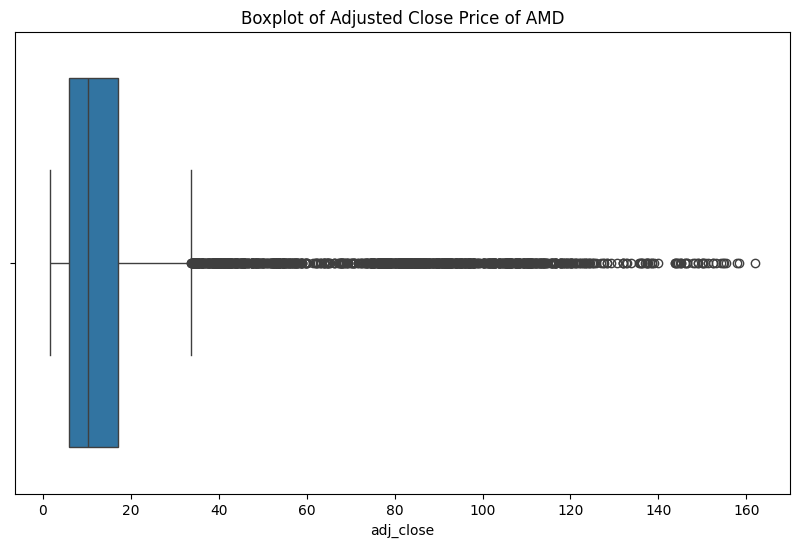

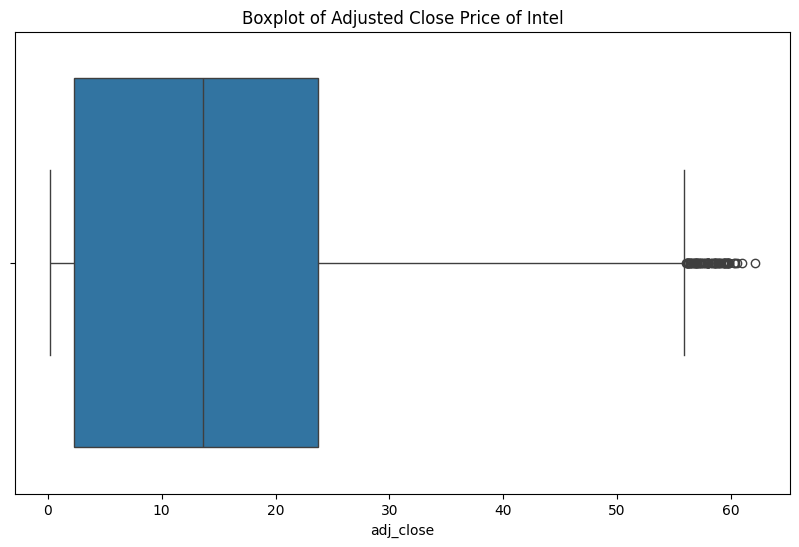

In [111]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=FixedAMD, x='adj_close')
plt.title('Boxplot of Adjusted Close Price of AMD')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=FixedIntel, x='adj_close')
plt.title('Boxplot of Adjusted Close Price of Intel')
plt.show()

As the IQR method has the most outliers we will take a look at the outliers using the IQR method.


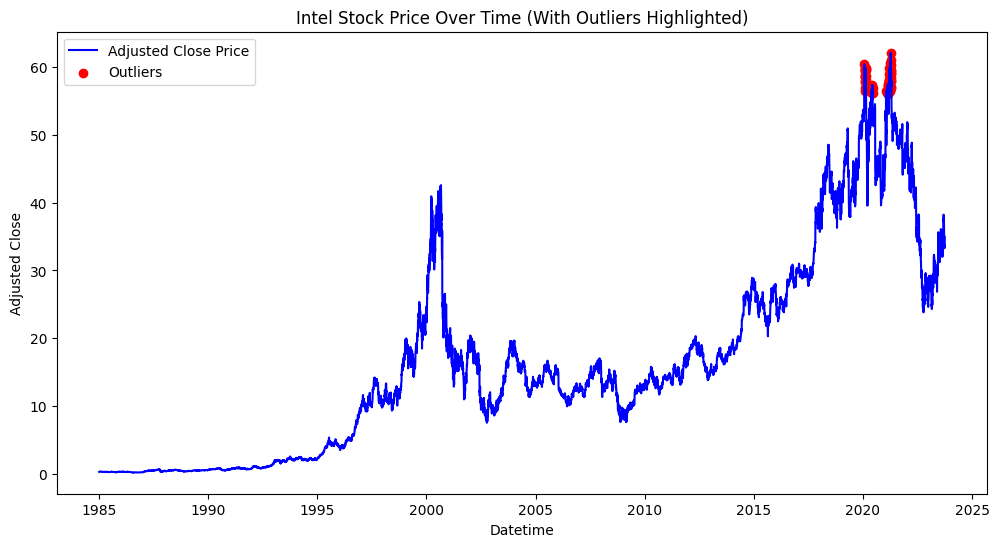

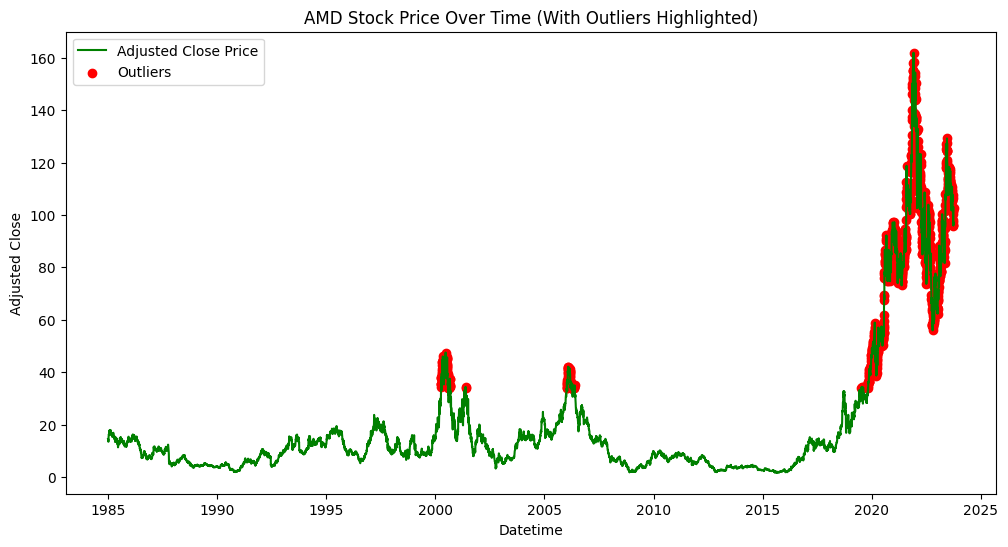

In [112]:

outliers_iqr_Intel = FixedIntel.loc[Intel_outliers_iqr.index]
outliers_iqr_AMD = FixedAMD.loc[AMD_outliers_iqr.index]


plt.figure(figsize=(12, 6))
plt.plot(FixedIntel['datetime'], FixedIntel['adj_close'], label='Adjusted Close Price', color='blue')
plt.scatter(outliers_iqr_Intel['datetime'], outliers_iqr_Intel['adj_close'], color='red', label='Outliers')
plt.xlabel('Datetime')
plt.ylabel('Adjusted Close')
plt.title('Intel Stock Price Over Time (With Outliers Highlighted)')
plt.legend()
plt.show()

# Plot AMD stock price and outliers
plt.figure(figsize=(12, 6))
plt.plot(FixedAMD['datetime'], FixedAMD['adj_close'], label='Adjusted Close Price', color='green')
plt.scatter(outliers_iqr_AMD['datetime'], outliers_iqr_AMD['adj_close'], color='red', label='Outliers')
plt.xlabel('Datetime')
plt.ylabel('Adjusted Close')
plt.title('AMD Stock Price Over Time (With Outliers Highlighted)')
plt.legend()
plt.show()

Intel's Outliers seem to be focused on 3 periods with big spikes and falls. With around a month between the first Outlier and the Last Outlier. Which is nothing compared to AMD Which has a massive amount of outliers compared to AMD. And its outliers are also during big spikes and falls. The day to day are also partly to blame because the prices are of the whole day and when stock prices can double in the matter of an hour, day to day data can't capture that effectifly. But getting good and enough Stock data of hour by hour is hard, without spending allot of money.

## Now what to do with these outliers?

    We could keep them as they are the actual value and while a AI may not learn as much from this data than when they are removed. But the model wil otherwise never be able to actually predict the price accuretly this way.

    We could remove them to predict the average's which could tell tell if its generally rising or falling.

In [113]:
# Remove outliers from the dataset
no_outliers_Intel = FixedIntel.loc[~FixedIntel.index.isin(outliers_iqr_Intel.index)]
no_outliers_AMD = FixedAMD.loc[~FixedAMD.index.isin(outliers_iqr_AMD.index)]

    Or we could Winsorizing the outliers which schould reduce the impact of the outliers.

In [114]:
Winsorized_Intel = FixedIntel.copy()
Winsorized_AMD = FixedAMD.copy()

# Columns to Winsorize
columns_to_winsorize = ['adj_close', 'close', 'high', 'low', 'open', 'volume']

# Apply Winsorization (Cap at 95th percentile for each column)
for column in columns_to_winsorize:
    upper_threshold = FixedIntel[column].quantile(0.95)  # Calculate the 95th percentile for the column
    Winsorized_Intel[column] = FixedIntel[column].clip(upper=upper_threshold)  # Cap values above the 95th percentile

# Apply Winsorization (Cap at 95th percentile for each column)
for column in columns_to_winsorize:
    upper_threshold = FixedAMD[column].quantile(0.95)  # Calculate the 95th percentile for the column
    Winsorized_AMD[column] = FixedAMD[column].clip(upper=upper_threshold)  # Cap values above the 95th percentile

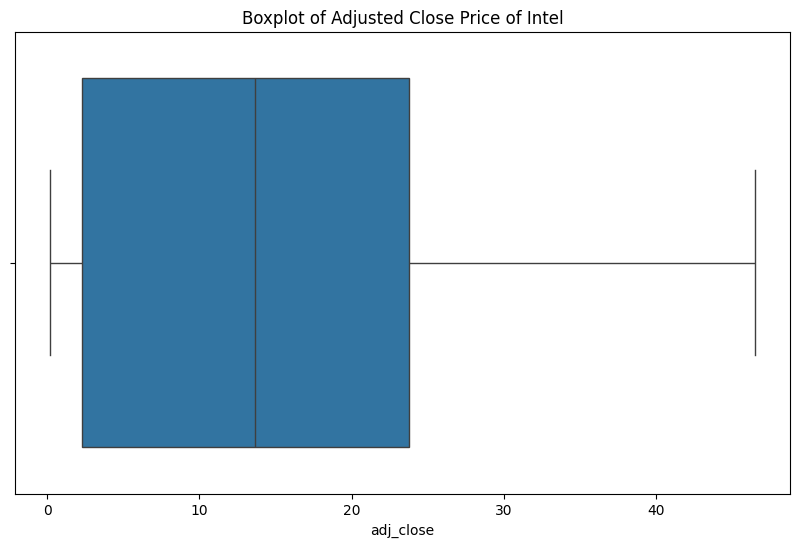

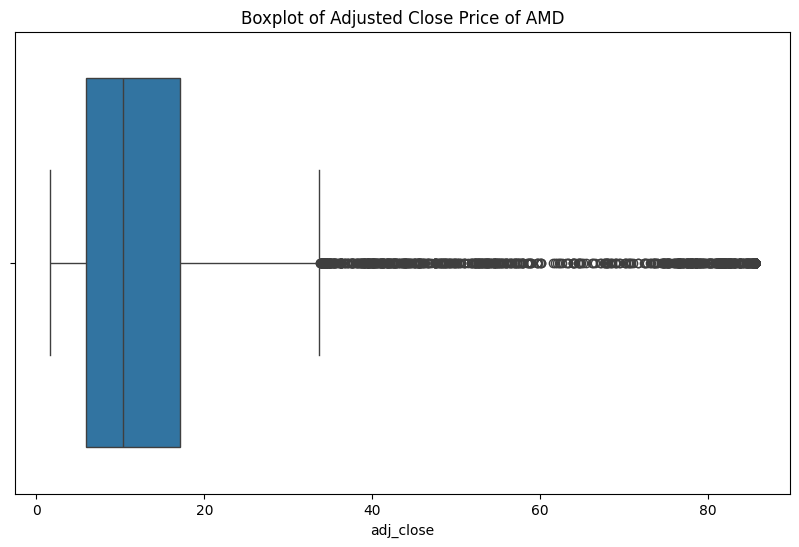

In [115]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=Winsorized_Intel, x='adj_close')
plt.title('Boxplot of Adjusted Close Price of Intel')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=Winsorized_AMD, x='adj_close')
plt.title('Boxplot of Adjusted Close Price of AMD')
plt.show()

The outliers of Intell seem to be gone, but AMD still seems to have more so lets take a close look at it.

In [116]:
Win_AMD_outliers_iqr, lower_bound, upper_bound = detect_outliers_iqr(Winsorized_AMD, 'adj_close')
print("\nOutliers for AMD:")
print("\nOutliers using IQR method:")
display(Win_AMD_outliers_iqr)
print("count:", len(Win_AMD_outliers_iqr))


Outliers for AMD:

Outliers using IQR method:


,datetime,adj_close,close,high,low,open,volume,z_score
3856,2000-04-05 00:00:00+00:00,34.1875,34.1875,34.531250,30.906250,32.000000,21476000,0.613779
3857,2000-04-06 00:00:00+00:00,35.5000,35.5000,37.125000,31.375000,36.375000,18208000,0.666025
3858,2000-04-07 00:00:00+00:00,37.7500,37.7500,37.750000,35.000000,35.437500,15218800,0.755590
3859,2000-04-10 00:00:00+00:00,37.7500,37.7500,39.593750,36.125000,38.375000,16499800,0.755590
3860,2000-04-11 00:00:00+00:00,35.3125,35.3125,35.875000,33.531250,35.781250,17022200,0.658561
...,...,...,...,...,...,...,...,...
9760,2023-09-25 00:00:00+00:00,85.5360,85.5360,87.148001,83.823997,85.632002,43223700,3.129268
9761,2023-09-26 00:00:00+00:00,85.5360,85.5360,87.148001,83.823997,85.632002,42866500,3.072742
9762,2023-09-27 00:00:00+00:00,85.5360,85.5360,87.148001,83.823997,85.632002,51261500,3.156735
9763,2023-09-28 00:00:00+00:00,85.5360,85.5360,87.148001,83.823997,85.632002,72542100,3.343429


count: 1154


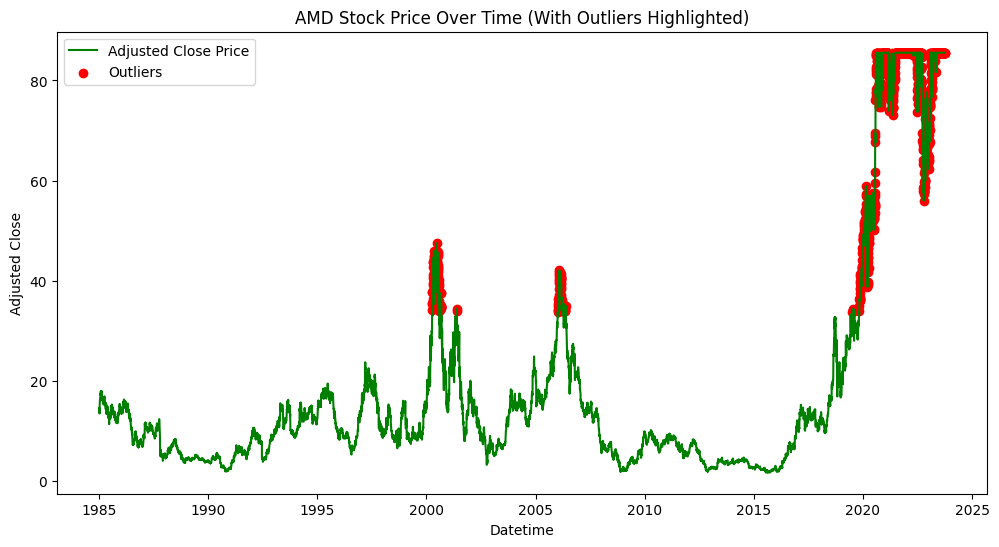

In [117]:
outliers_iqr_AMD = FixedAMD.loc[Win_AMD_outliers_iqr.index]

# Plot AMD stock price and outliers
plt.figure(figsize=(12, 6))
plt.plot(Winsorized_AMD['datetime'], Winsorized_AMD['adj_close'], label='Adjusted Close Price', color='green')
plt.scatter(Win_AMD_outliers_iqr['datetime'], Win_AMD_outliers_iqr['adj_close'], color='red', label='Outliers')
plt.xlabel('Datetime')
plt.ylabel('Adjusted Close')
plt.title('AMD Stock Price Over Time (With Outliers Highlighted)')
plt.legend()
plt.show()

a cap of 5% doesn't have any effect the amount of outliers are still the same so what happens when we cap it more?

In [118]:

Winsorized_AMD = FixedAMD.copy()

# Columns to Winsorize
columns_to_winsorize = ['adj_close', 'close', 'high', 'low', 'open', 'volume']

# Apply Winsorization (Cap at 85th percentile for each column)
for column in columns_to_winsorize:
    upper_threshold = FixedAMD[column].quantile(0.85)  # Calculate the 85th percentile for the column
    Winsorized_AMD[column] = FixedAMD[column].clip(upper=upper_threshold)  # Cap values above the 85th percentile

In [119]:
Win_AMD_outliers_iqr, lower_bound, upper_bound = detect_outliers_iqr(Winsorized_AMD, 'adj_close')
print("\nOutliers for AMD:")
print("\nOutliers using IQR method:")
display(Win_AMD_outliers_iqr)
print("count:", len(Win_AMD_outliers_iqr))


Outliers for AMD:

Outliers using IQR method:


,datetime,adj_close,close,high,low,open,volume,z_score


count: 0


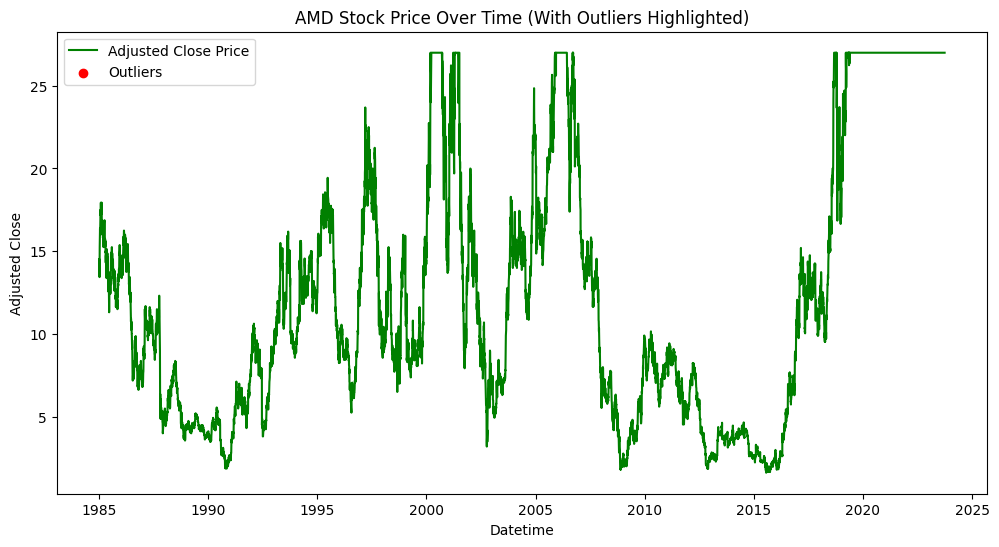

In [120]:
outliers_iqr_AMD = FixedAMD.loc[Win_AMD_outliers_iqr.index]

# Plot AMD stock price and outliers
plt.figure(figsize=(12, 6))
plt.plot(Winsorized_AMD['datetime'], Winsorized_AMD['adj_close'], label='Adjusted Close Price', color='green')
plt.scatter(outliers_iqr_AMD['datetime'], outliers_iqr_AMD['adj_close'], color='red', label='Outliers')
plt.xlabel('Datetime')
plt.ylabel('Adjusted Close')
plt.title('AMD Stock Price Over Time (With Outliers Highlighted)')
plt.legend()
plt.show()

It seems to have worked well, it has capped all the outliers and it looks nothing like our stock prices and as so we will keep the outliers.